In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist


2024-05-01 14:22:33.358597: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 14:22:34.493559: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

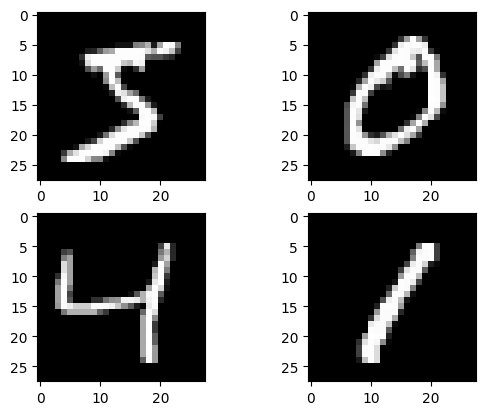

In [3]:
plt.subplot(221)
plt.imshow(x_train[0],cmap=plt.get_cmap("grey"))
plt.subplot(222)
plt.imshow(x_train[1],cmap=plt.get_cmap("grey"))
plt.subplot(223)
plt.imshow(x_train[2],cmap=plt.get_cmap("grey"))
plt.subplot(224)
plt.imshow(x_train[3],cmap=plt.get_cmap("grey"))

plt.show()

We can flatten the 2-D array of images into a vector of 28×28=784 numbers. It is irrespective of how we flatten the array, as long as we’re consistent between images. From this perspective, the MNIST images are just a bunch of points in a vector space of 784-dimensional. But the data should always be of the format “(Number of data points, data point dimension)”. In this case, the training data will be of format 60,000×784.

In [4]:
num_pixels=x_train.shape[1]*x_train.shape[2]
print(f"we are going to convert the input images vector with shape ",x_train.shape,"to",(x_train.shape[0], num_pixels))

we are going to convert the input images vector with shape  (60000, 28, 28) to (60000, 784)


In [5]:
x_train=x_train.reshape(x_train.shape[0],num_pixels).astype("float32")
x_test=x_test.reshape(x_test.shape[0],num_pixels).astype("float32")
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Normalize the input vector

In [6]:
x_train = x_train / 255
x_test = x_test / 255

<h4>Adding Noise to the Images</h4>

The noise factor is multiplied with a random matrix that has a mean of 0.0 and a standard deviation of 1.0. This matrix will draw samples from a normal (Gaussian) distribution.

In [7]:
noise_factor =0.2
x_train_noisy=x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy=x_test + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

In [8]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

To ensure that our final images array item values are within the range of 0 to 1, we may use np.clip method. The clip is a Numpy function that clips the values outside of the Min-Max range and replaces them with the designated min or max value.

In [9]:
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h4>sigmoid activation function is just used to convert the vector values to the range of 0-1</h4>

Since the pixel values in the input images are normalized to a range of [0, 1], using a sigmoid activation function in the last layer of the decoder is appropriate. The sigmoid function squashes the output values to the range [0, 1], which matches the input data's range. 

In [10]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
model.fit(x_train_noisy,x_train,validation_data=(x_test_noisy,x_test),epochs=20,batch_size=200)

2024-05-01 14:22:39.465426: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-05-01 14:22:39.759919: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0705 - val_loss: 0.0207
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0189 - val_loss: 0.0143
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0137 - val_loss: 0.0117
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0116 - val_loss: 0.0103
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0087 - val_loss: 0.0081
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0080 - val_loss: 0.0078
Epoch 9/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 10/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0074 - val_loss: 0.0072
Epoch 11/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0070 - val_loss: 0.0073
Epoch 12/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 

<h2>Evaluating The Model</h2>

In [12]:
pred = model.predict(x_test_noisy)

159/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
pred.shape

(10000, 784)

In [14]:
x_test.shape

(10000, 784)

Test Images


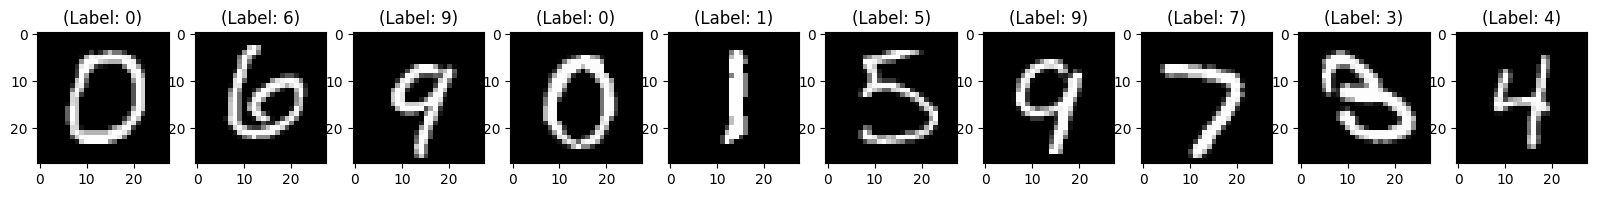

Test Images with Noise


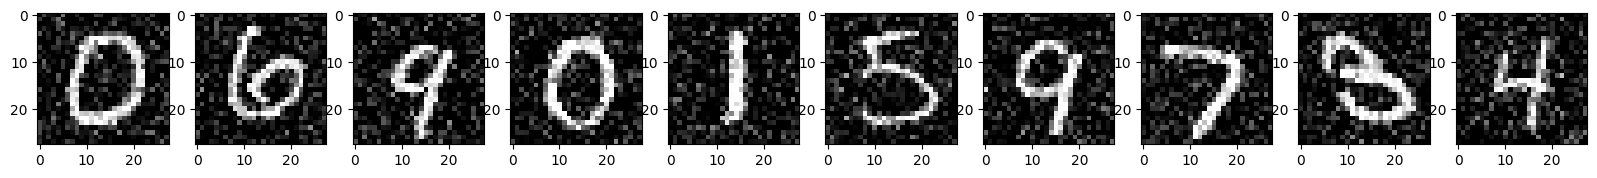

Reconstruction of Noisy Test Images


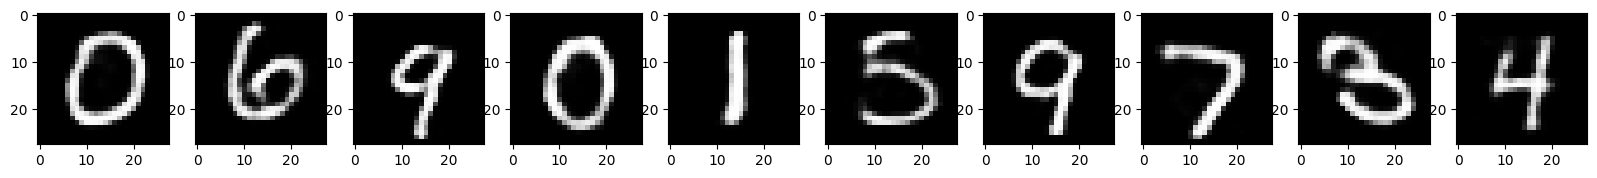

In [15]:
x_test = np.reshape(x_test, (10000,28,28)) *255
pred = np.reshape(pred, (10000,28,28)) *255
x_test_noisy = np.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()